## Laboratorio 10 - Algoritmos Genéticos

Stefano Aragoni, Luis Diego Santos, Carol Arevalo

Para este ejercicio, hemos decidido trabajar con Algoritmos Genéticos aplicados a un problema de Ruteo de Vehículos (VRP). A continuación, se presenta el código segmentado y explicado en diferentes partes para cumplir con los requerimientos del laboratorio.

____
#### Importación de Librerías

In [1]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt


____
#### Definición de Clases Base y Parámetros del Problema

En esta sección, creamos las clases base para nuestro problema utilizando deap. Esta librería nos permite crear algoritmos genéticos de manera sencilla y eficiente.

Definimos también los parámetros específicos de nuestro problema de ruteo de vehículos, como la ubicación del depósito, los clientes, las distancias entre ellos y la capacidad del vehículo.

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

depot = 0
customers = [(1, 4), (2, 6), (3, 3), (4, 2), (5, 6)]
distances = [
    [0, 2.8, 4.5, 7.2, 5.4, 8.4],
    [2.8, 0, 3.7, 4.4, 7.9, 5.3],
    [4.5, 3.7, 0, 2.8, 4.6, 2.2],
    [7.2, 4.4, 2.8, 0, 5.0, 2.5],
    [5.4, 7.9, 4.6, 5.0, 0, 4.2],
    [8.4, 5.3, 2.2, 2.5, 4.2, 0]
]
vehicle_capacity = 10


<font color='orange'>Función Objetivo/Fitness/Aptitud </font>

In [3]:
def evaluate_individual(individual):
    total_distance = 0
    current_demand = 0
    current_depot = depot
    
    for customer in individual:
        if customer == depot:
            current_demand = 0
            continue
        total_distance += distances[current_depot][customer]
        current_demand += customers[customer-1][1]
        if current_demand > vehicle_capacity:
            total_distance += distances[customer][depot]
            current_depot = depot
            current_demand = 0
    total_distance += distances[customer][depot]
    return total_distance,

In [4]:
def init_individual():
    individual = [depot] + random.sample(range(1, len(customers) + 1), len(customers))
    return creator.Individual(individual)


La función init_individual inicializa un individuo de manera aleatoria, mientras que evaluate_individual calcula la distancia total recorrida por un vehículo, teniendo en cuenta la capacidad del mismo.

#### Registro de Operadores Genéticos y Configuración del Algoritmo

Registramos los operadores gen  éticos y las funciones que hemos definido anteriormente en el toolbox. También configuramos los parámetros del algoritmo genético, como el tamaño de la población, el número de generaciones, y las probabilidades de cruzamiento y mutación.

A continuación se encuentran la <font color='orange'>función de Selección,  función de Crossover y función de Mutación </font>

In [5]:
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxPartialyMatched)                   # crossover
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)     # mutation
toolbox.register("select", tools.selTournament, tournsize=3)        # selection

population_size = 100
num_generations = 100
cxpb = 0.8
mutpb = 0.2

population = toolbox.population(n=population_size)


_____
#### Ejecución del Algoritmo Genético y Resultados

Finalmente, ejecutamos el algoritmo genético, recopilamos estadísticas durante la ejecución y mostramos los resultados finales, incluyendo la mejor solución encontrada y su respectiva distancia total.

A continuación se encuentra la <font color='orange'>función de Ejecución</font>

In [6]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, num_generations, stats=stats, verbose=True)

best_individual = tools.selBest(population, 1)[0]
print("Mejor solución encontrada: ", best_individual)
print("Distancia total de la mejor solución: ", best_individual.fitness.values[0])


gen	nevals	min 	avg   
0  	100   	35.6	40.061
1  	77    	35.5	38.82 
2  	82    	35.6	37.655
3  	81    	35.6	37.031
4  	81    	35.6	36.184
5  	77    	35.6	36.234
6  	86    	35.5	36.006
7  	81    	32.8	35.715
8  	86    	32.8	35.667
9  	83    	32.8	35.174
10 	86    	32.8	34.234
11 	89    	32.8	33.166
12 	73    	32.8	32.963
13 	85    	32.8	32.867
14 	92    	32.8	32.863
15 	83    	32.8	32.827
16 	77    	32.8	32.989
17 	88    	32.8	32.837
18 	89    	32.8	33.202
19 	89    	32.8	32.983
20 	85    	32.8	32.917
21 	82    	32.8	32.949
22 	85    	32.8	33.077
23 	86    	32.8	33.049
24 	74    	32.8	32.985
25 	85    	32.8	32.884
26 	88    	32.8	33.196
27 	84    	32.8	32.945
28 	89    	31.1	32.783
29 	88    	31.1	32.981
30 	89    	32.8	33.161
31 	92    	32.8	32.974
32 	89    	32.8	32.882
33 	79    	32.8	32.992
34 	73    	32.8	32.911
35 	87    	32.8	32.893
36 	84    	32.8	32.974
37 	90    	32.8	32.856
38 	90    	32.8	32.883
39 	84    	32.8	32.939
40 	84    	32.8	32.953
41 	76    	32.8	33.011
42 	80    	

53 	88    	31.1	31.472
54 	84    	31.1	31.328
55 	76    	31.1	31.284
56 	80    	31.1	31.341
57 	85    	31.1	31.546
58 	82    	31.1	31.198
59 	89    	31.1	31.227
60 	77    	31.1	31.318
61 	87    	31.1	31.501
62 	77    	31.1	31.61 
63 	80    	31.1	31.256
64 	83    	31.1	31.61 
65 	92    	31.1	31.2  
66 	81    	31.1	31.263
67 	74    	31.1	31.357
68 	87    	31.1	31.269
69 	76    	31.1	31.523
70 	82    	31.1	31.126
71 	87    	31.1	31.301
72 	86    	31.1	31.144
73 	78    	31.1	31.283
74 	85    	31.1	31.171
75 	83    	31.1	31.173
76 	89    	31.1	31.21 
77 	79    	31.1	31.403
78 	87    	31.1	31.245
79 	92    	31.1	31.329
80 	87    	31.1	31.427
81 	93    	31.1	31.342
82 	83    	31.1	31.207
83 	89    	31.1	31.412
84 	90    	31.1	31.39 
85 	76    	31.1	31.367
86 	78    	31.1	31.667
87 	80    	31.1	31.577
88 	84    	31.1	31.313
89 	82    	31.1	31.481
90 	89    	31.1	31.433
91 	83    	31.1	31.173
92 	82    	31.1	31.383
93 	89    	31.1	31.21 
94 	86    	31.1	31.285
95 	81    	31.1	31.386
96 	92    	

Visualización de la Ruta

In [8]:
def plot_route(individual, customers, depot_location=(0, 0), title="Funcion Objetivo 1"):
    # Convertir la ruta en coordenadas
    route = [depot_location] + [customers[c-1] for c in individual if c != 0] + [depot_location]
    route = np.array(route)

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(route[:, 0], route[:, 1], marker='o', linestyle='-')

    # Anotar los clientes y el depósito
    for i, (x, y) in enumerate(route):
        if i == 0:
            label = 'Depot'
        else:
            label = f'Cliente {individual[i - 1]}'
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title('Visualización de la Ruta - ' + title)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    plt.show()


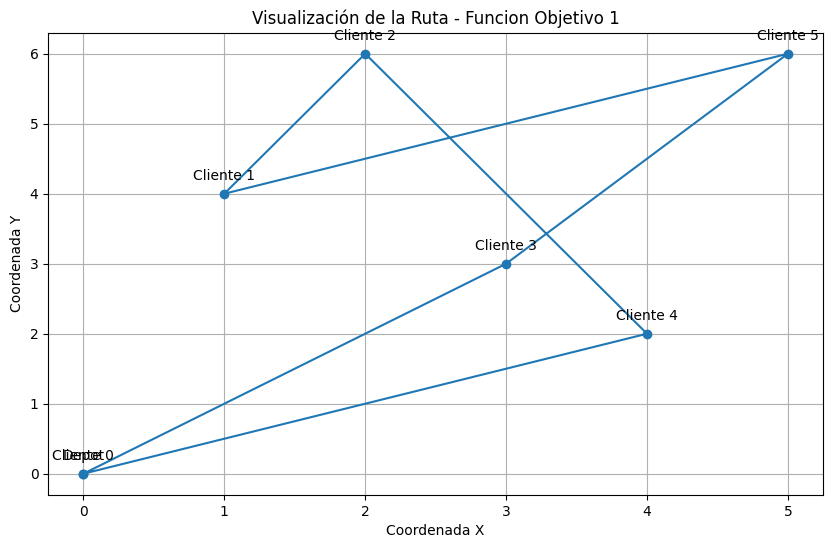

In [9]:
# Ejecutar la función de visualización con la mejor solución encontrada
plot_route(best_individual, customers, depot_location=(0, 0))

Finalmente, cabe destacar que (según la investigación realizada) este problema **NO** es de optimización de funciones. Sino, es un problema de optimización combinatoria, donde el objetivo es encontrar la mejor ruta para visitar un conjunto de clientes con restricciones de capacidad y otras limitaciones.

Por tal razón, no es posible utilizar diferentes funciones de fitness para evaluar la calidad de las soluciones. Esto debido a que no es una función matemática que se pueda probar o cambiar, sino es una serie de restricciones que se deben cumplir.

____
#### Conclusión y Observaciones

*Resultados*

Después de 100 generaciones de evolución, se logró encontrar un conductor apto para realizar la ruta de los clientes. El algoritmo genético ha encontrado una solución óptima o cerca de la óptima para el problema planteado. La mejor solución encontrada tiene una distancia total de aproximadamente 31.1 unidades. Esta solución representa la secuencia de clientes a visitar que minimiza la distancia total recorrida, considerando las restricciones y la capacidad del vehículo.

*Observaciones*

1. **Convergencia**: Basándonos en los valores mínimos y promedio por generación, se puede observar que el algoritmo converge hacia una solución óptima. Esto es una buena señal de que los operadores genéticos y los parámetros seleccionados están trabajando de manera efectiva.

2. **Diversidad**: Aunque el algoritmo está convergiendo, también es importante notar que la diversidad (variedad de soluciones) se mantiene a lo largo de las generaciones. Esto es crucial para evitar caer en óptimos locales y asegurarse de explorar adecuadamente el espacio de soluciones.

3. **Selección de Parámetros**: Los parámetros como el tamaño de la población, la probabilidad de cruzamiento (cxpb) y la probabilidad de mutación (mutpb) son cruciales para el desempeño del algoritmo. Una selección adecuada de estos parámetros puede llevar a una convergencia más rápida y a soluciones más precisas.

4. **Efectividad de los Operadores Genéticos**: Los operadores de cruzamiento y mutación seleccionados son adecuados para el tipo de codificación y problema abordado. Esto se refleja en la mejora constante de las soluciones a lo largo de las generaciones.

5. **Estabilidad**: El algoritmo muestra una tendencia estable hacia la mejora, sin presentar fluctuaciones significativas en el valor de la función objetivo. Esto indica que el equilibrio entre exploración y explotación es adecuado.

*Conclusión*

El uso de algoritmos genéticos ha demostrado ser una herramienta poderosa para la optimización de problemas complejos y combinatorios. A través de la evolución y selección natural, es posible encontrar soluciones óptimas o cercanas a la óptima de manera eficiente. En este caso particular, se ha aplicado con éxito para optimizar la ruta de un vehículo, minimizando la distancia total recorrida y respetando las restricciones de capacidad.

El experimento también destaca la importancia de una buena definición de la función de aptitud, operadores genéticos y parámetros del algoritmo, ya que estos elementos son clave para el éxito de la optimización.

#### Referencias:

1. Science Direct. (2020). ScienceDirect. Sciencedirect. https://sciencedirect.com/topics/engineering/genetic-algorithm.

2. Mallawaarachchi, V. (2017). Introduction to Genetic Algorithms — Including Example Code | by Vijini Mallawaarachchi | Towards Data Science. Towardsdatascience. https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3.

3. Dimension IA. (s.f.). Algoritmos Genéticos: Qué Son, Cómo Funcionan, Tipos y Cuando Aplicarlos - DimensionIA. Dimensionia. https://dimensionia.com/algortimos-geneticos-que-son-como-funcionan/.

4. Cor, S. (2023). Algoritmos Genéticos en la IA - Qué son, Ejemplos y Aplicaciones. Aprendeinformaticas. https://aprendeinformaticas.com/algoritmos-geneticos-que-es/.

5. Brownlee, J. (2021). Simple Genetic Algorithm From Scratch. Machinelearningmastery. https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/.

6. Python Pool. (2020). Mastering Python Genetic Algorithms. Pythonpool. https://pythonpool.com/python-genetic-algorithm/#:~:text=Implementation of a Python Genetic Algorithm 1 Initialization,Crossover .. 5 Mutation .. 6 Repeat .
